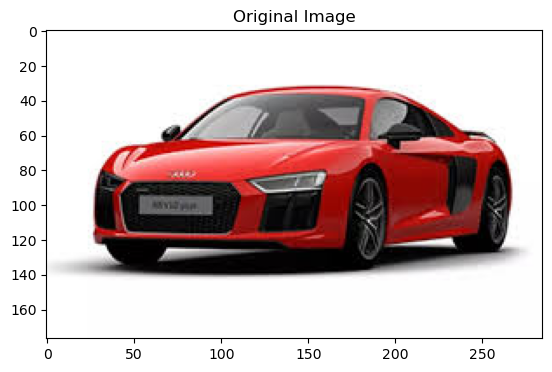

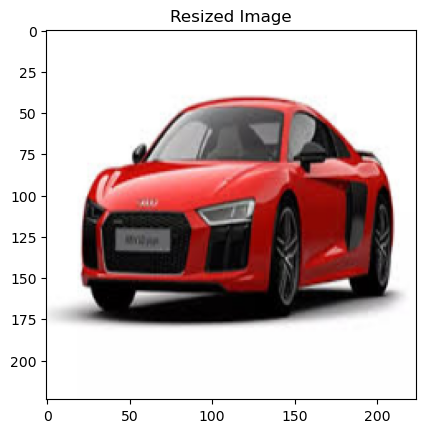

In [8]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set parameters
img_size = 224
channels = 3

train_folder = "/Users/ummefahmidaakter/Downloads/cars/Train/audi"

# Loop through each file in the folder for the current class
for file in os.listdir(train_folder):
    if file == '3.jpg':  # specify the file you want to see before and after
        file_path = os.path.join(train_folder, file)

        # Read the image from the file path
        img = Image.open(file_path)

        # Display the original image
        plt.imshow(img)
        plt.title('Original Image')
        plt.show()

        # Resize the image to the desired size
        resized_img = cv2.resize(np.array(img), (img_size, img_size))

        # Display the resized image
        plt.imshow(resized_img)
        plt.title('Resized Image')
        plt.show()

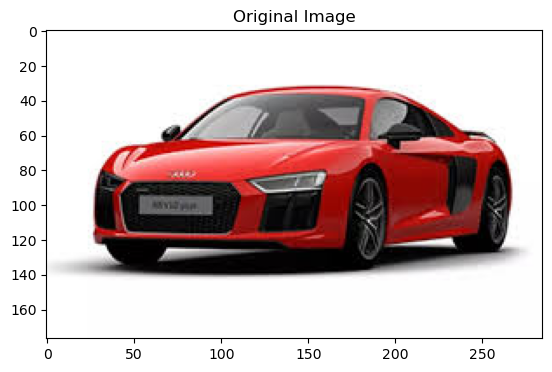

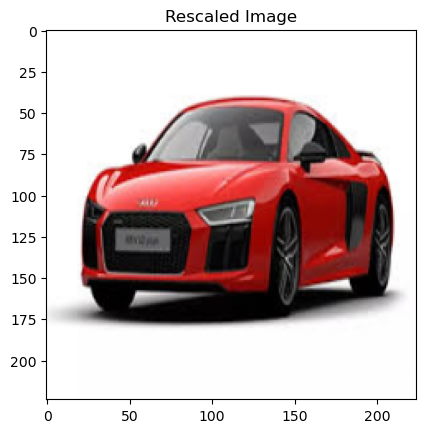

In [10]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set parameters
img_size = 224
channels = 3

train_folder = "/Users/ummefahmidaakter/Downloads/cars/Train/audi"

# Loop through each file in the folder
for file in os.listdir(train_folder):
    if file == '3.jpg':  # specify the file you want to rescale
        file_path = os.path.join(train_folder, file)

        # Read the image from the file path
        img = Image.open(file_path)

        # Display the original image
        plt.imshow(img)
        plt.title('Original Image')
        plt.show()

        # Resize the image to the desired size
        resized_img = cv2.resize(np.array(img), (img_size, img_size))
        # Rescale the pixel values to the valid range
        rescaled_img = resized_img / 255.0

        # Display the rescaled image
        plt.imshow(rescaled_img)
        plt.title('Rescaled Image')
        plt.show()

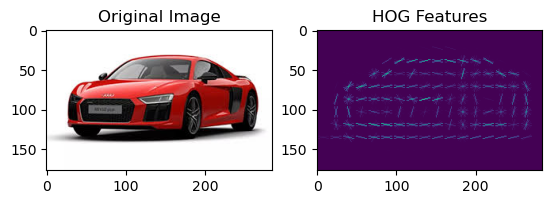

In [12]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

img_size = 224
channels = 3

train_folder = "/Users/ummefahmidaakter/Downloads/cars/Train/audi"

# Replace os.listdir with a list containing the image file name
file_name = "3.jpg"
file_path = os.path.join(train_folder, file_name)

# Check if the file is an image file
if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg"):
    # Read the image from the file path
    img = Image.open(file_path)

    # Display the original image
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax1.set_title('Original Image')

    # Extract HOG features from the image
    img_array = np.array(img)
    # Resize the image to the desired size
    img = cv2.resize(np.array(img), (img_size, img_size))
    hog_features, hog_image = hog(img_array, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    # Check if the length of hog_features is less than or equal to 1000 before padding
    if len(hog_features) <= 1000:
        hog_features = np.pad(hog_features, (0, 1000 - len(hog_features)), mode='constant')
    else:
        hog_features = hog_features[:1000]

    # Display the HOG image
    ax2.imshow(hog_image)
    ax2.set_title('HOG Features')
    plt.show()


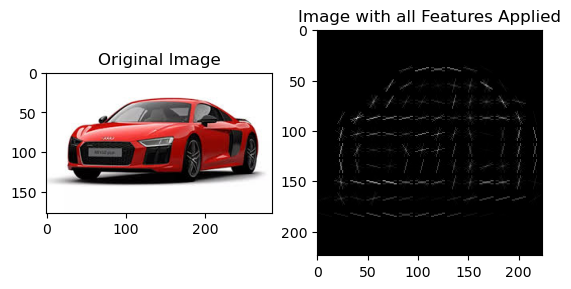

In [13]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

# Set parameters
img_size = 224
channels = 3

train_folder = "/Users/ummefahmidaakter/Downloads/cars/Train/audi"

# Create a StandardScaler object to normalize the image
scaler = StandardScaler()

# Loop through each file in the folder for the current class
for file in os.listdir(train_folder):
    if file == '3.jpg':  # specify the file you want to see before and after
        file_path = os.path.join(train_folder, file)

        # Read the image from the file path
        img = Image.open(file_path)
        
            # Resize the image to the desired size
        resized_img = cv2.resize(np.array(img), (img_size, img_size))
            
            # Normalize the image using StandardScaler
        flattened_img = resized_img.flatten()
        normalized_img = scaler.fit_transform(flattened_img.reshape(-1, 1))
        normalized_img = normalized_img.reshape(resized_img.shape)

            # Rescale the pixel values to the valid range
        rescaled_img = (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min())
            
        hog_features, hog_img = hog(rescaled_img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

            # Check if the length of hog_features is less than or equal to 1000 before padding
        if len(hog_features) <= 1000:
            hog_features = np.pad(hog_features, (0, 1000 - len(hog_features)), mode='constant')
        else:
            hog_features = hog_features[:1000]
                
            # Display the original image and the image with all features applied
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(np.array(Image.open(file_path)))
        ax1.set_title('Original Image')
        ax2.imshow(hog_img, cmap='gray')
        ax2.set_title('Image with all Features Applied')
        plt.show()